In [49]:
import pandas as pd
from tensorflow.keras.layers import Embedding

In [50]:
data = pd.read_csv('/content/mail_data - mail_data.csv')

In [51]:
print(data.head(10))
feedback = data["Message"]

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
6      ham  Even my brother is not like to speak with me. ...
7      ham  As per your request 'Melle Melle (Oru Minnamin...
8     spam  WINNER!! As a valued network customer you have...
9     spam  Had your mobile 11 months or more? U R entitle...


In [52]:
from collections import Counter
words = []
for sentence in feedback:
    words.extend(sentence.lower().replace('.', '').replace(',', '').split())

word_count = Counter(words).most_common(10000)
word_count_dic = {}
for i in word_count:
  word_count_dic[i[0]] = i[1]


In [53]:
decoded_review = ' '
for k in range(len(feedback)):
  for i in feedback[k].split(" "):
    if i in word_count_dic:
      decoded_review += i + ' '
    else:
      decoded_review += '?' + ' '

In [54]:
decoded_review

' ? until jurong ? ? ? only in bugis n great world la e ? ? there got amore ? ? ? ? wif u ? ? entry in 2 a wkly comp to win ? ? final tkts 21st ? ? ? ? to 87121 to receive entry question(std txt ? apply 08452810075over18\'s ? dun say so early ? ? c already then ? ? ? don\'t think he goes to ? he lives around here though ? ? there darling it\'s been 3 week\'s now and no word back! ? like some fun you up for it still? ? ok! ? std chgs to ? ? to rcv ? my brother is not like to speak with ? ? treat me like aids ? ? per your request ? ? ? ? ? ? has been set as your callertune for all ? ? *9 to copy your friends ? ? ? a valued network customer you have been selected to receivea £900 prize reward! ? claim call ? ? code ? ? 12 hours ? ? your mobile 11 months or more? ? ? entitled to ? to the latest colour mobiles with camera for ? ? ? ? ? ? ? on 08002986030 ? gonna be home soon and i don\'t want to talk about this stuff anymore ? k? ? cried enough ? ? chances to win ? ? 100 to ? pounds txt> ? 

In [55]:
def Hot_encoding(word):
  if word == "ham":
    return 1
  else:
    return 0

In [56]:
for sentence in feedback:
  for word in sentence.split(" "):
    if word not in word_count_dic:
      sentence = sentence.replace(word, " ")

data['Category'] = data['Category'].apply(Hot_encoding)
category = data["Category"]

In [57]:
print(category)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64


In [58]:
tokinizer = Tokenizer(num_words = 10000)
tokinizer.fit_on_texts(feedback)
sequences = tokinizer.texts_to_sequences(feedback)
padded = pad_sequences(sequences, maxlen = 100)

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(padded, category, test_size=0.2, random_state=42, stratify=category)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Train: {len(X_train)} | Validation: {len(X_val)} | Test: {len(X_test)}")


Train: 4457 | Validation: 557 | Test: 558


In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [68]:
model = Sequential([
    Embedding(10000, 16),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ["accuracy"])

In [69]:
from keras import callbacks

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights = True)

reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

In [71]:
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_val, y_val), callbacks = [early_stop, reduce_lr])

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8707 - loss: 0.3212 - val_accuracy: 0.9838 - val_loss: 0.0487 - learning_rate: 0.0010
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9919 - loss: 0.0393 - val_accuracy: 0.9892 - val_loss: 0.0281 - learning_rate: 0.0010
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9963 - loss: 0.0158 - val_accuracy: 0.9874 - val_loss: 0.0363 - learning_rate: 0.0010
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9991 - loss: 0.0048 - val_accuracy: 0.9820 - val_loss: 0.0474 - learning_rate: 0.0010
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9994 - loss: 0.0048 - val_accuracy: 0.9820 - val_loss: 0.0495 - learning_rate: 0.0010
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9999 - loss: 0.0014 - val_accuracy: 0.9856 - val_loss: 0.0474 - learning_rate: 5.0000e-04
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 9.19

In [72]:
model.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9803 - loss: 0.0781 


[0.079383485019207, 0.980286717414856]

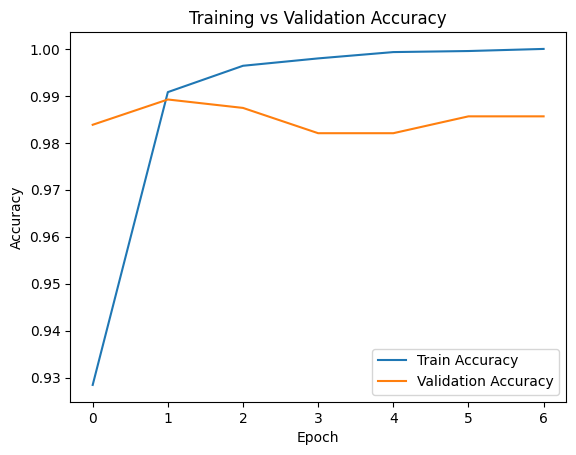

In [74]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()
